In [21]:
import numpy as np
from clustering.kmesar import KMESA
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [9]:
X, y = make_blobs(n_samples=100000, centers=20, center_box=(-1000, 1000), cluster_std=30)

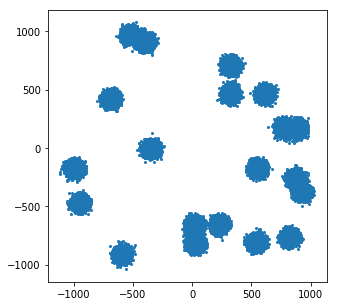

In [24]:
fig = plt.figure(figsize=(5, 5))

plt.scatter(X[:, 0], X[:, 1], s=4)
fig.savefig('20_clusters_huge_dataset')

plt.show()

In [12]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

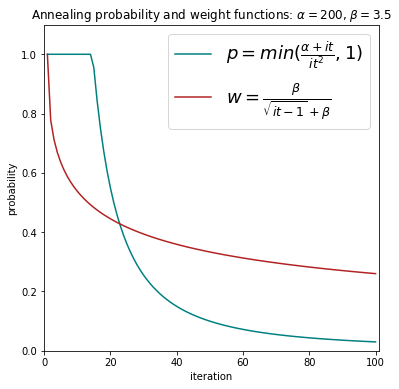

In [18]:
methods = ['max', 'min', 'maxmin', 'cluster_own', 'cluster_other', 'cluster_mean',
           'centroid_split', 'centroid_gather', 'carousel', 'random']
inertias = []

est_temp = KMESA(annealing_prob_function='sq', alpha=200, annealing_weight_function='sqrt', beta=3.5)
est_temp.plot_annealing_functions(n_iter=100)


Method: max

------------- KMESA clustering -------------
    * Iterations before convergence: 226
    * Total empty cluster resolutions: 2
    * Total annealings: 595
    * Sum of squared error:  6.05e+06
    * Time elapsed: 18min 27s
 ---------------------------------------------

Method: min

------------- KMESA clustering -------------
    * Iterations before convergence: 70
    * Total empty cluster resolutions: 2
    * Total annealings: 529
    * Sum of squared error:  4.74e+06
    * Time elapsed: 8min 18s
 ---------------------------------------------

Method: maxmin

------------- KMESA clustering -------------
    * Iterations before convergence: 240
    * Total empty cluster resolutions: 8
    * Total annealings: 610
    * Sum of squared error:  4.74e+06
    * Time elapsed: 19min 30s
 ---------------------------------------------

Method: cluster_own

------------- KMESA clustering -------------
    * Iterations before convergence: 208
    * Total empty cluster resolutions: 

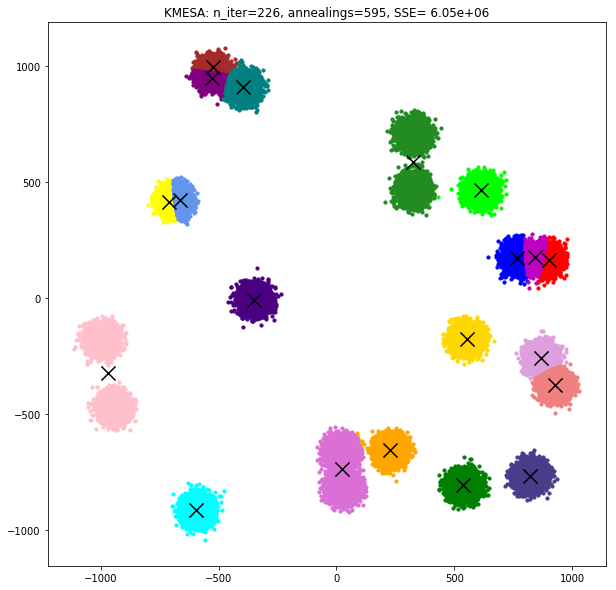

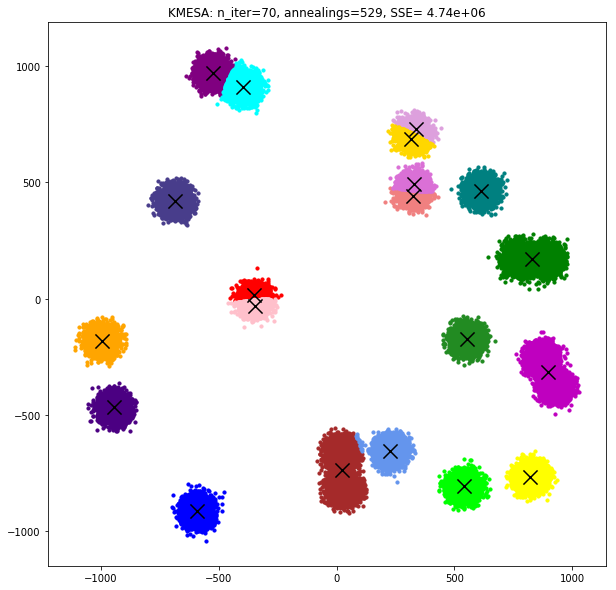

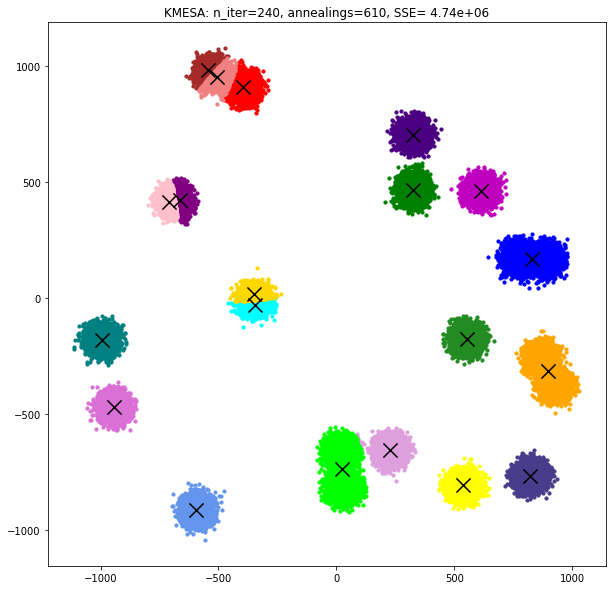

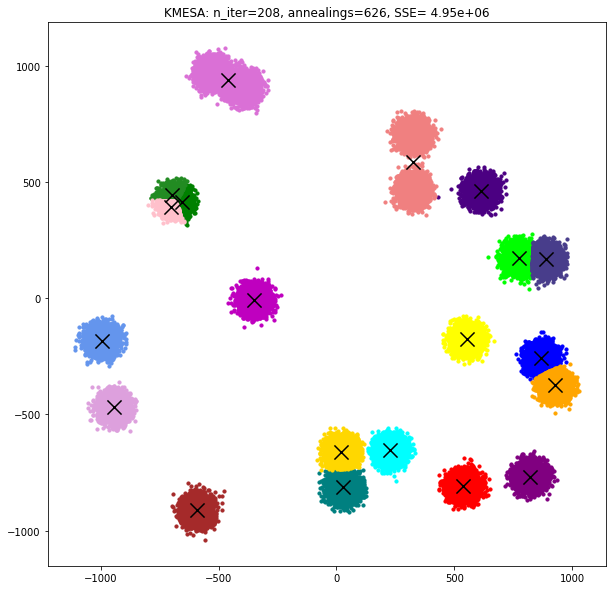

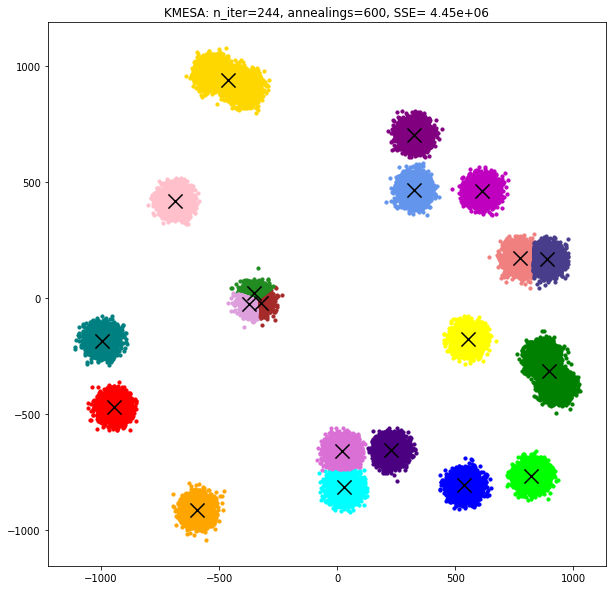

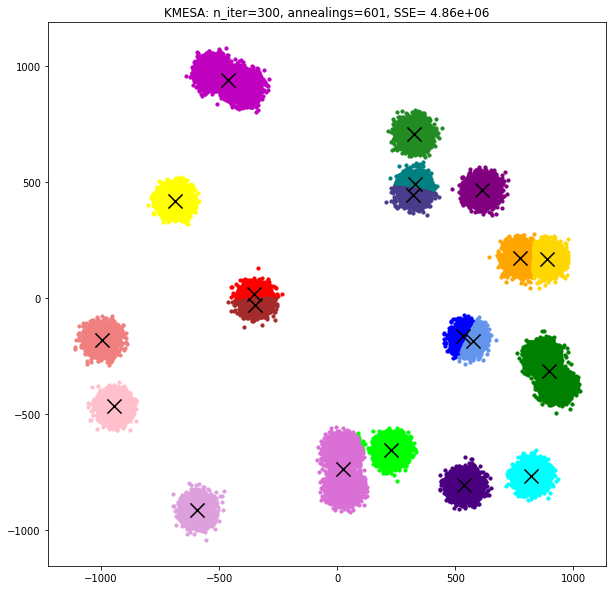

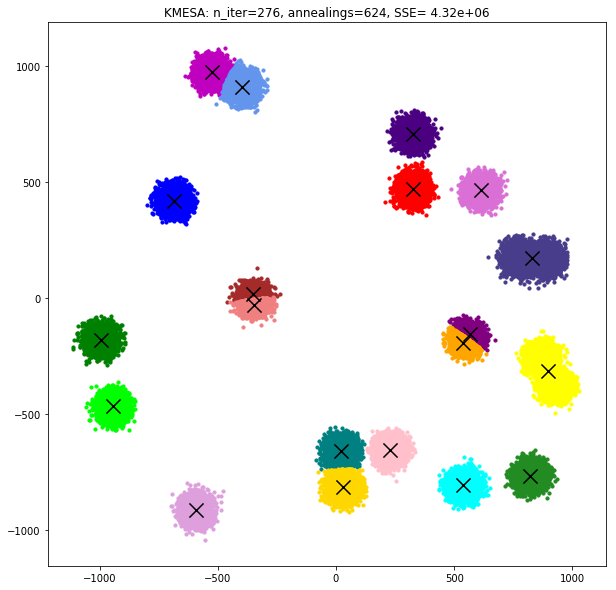

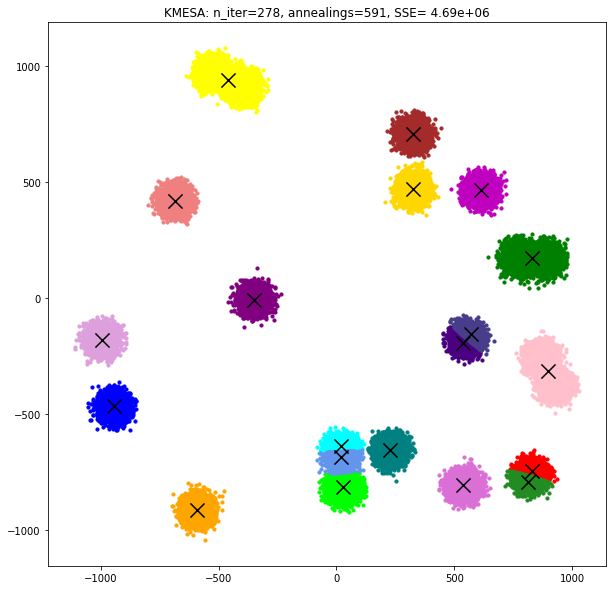

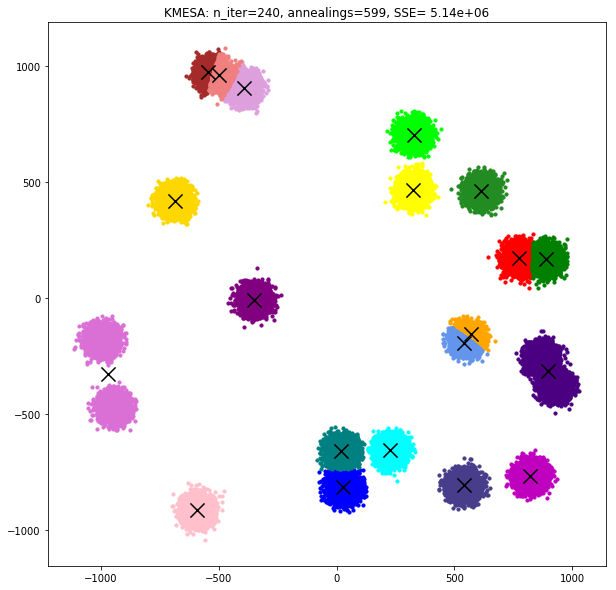

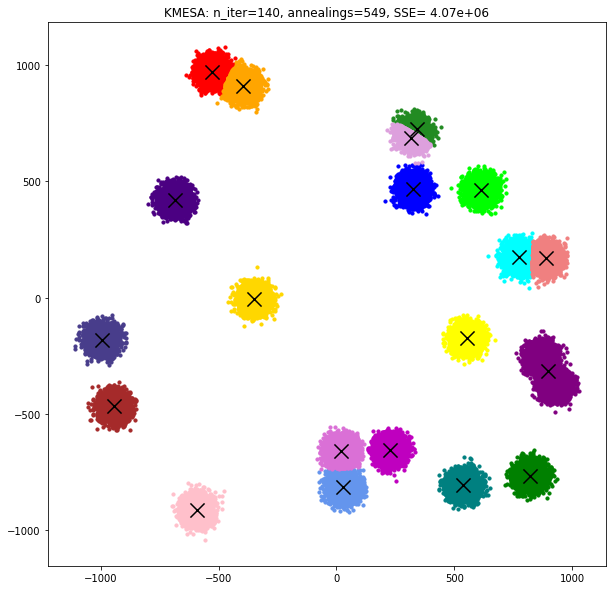

In [19]:
for method in methods:
    est = KMESA(k_clusters=20,
                init='random',
                n_init=2,
                tol=1e-2,
                annealing_method=method,
                annealing_prob_function='sq',
                alpha=200,
                annealing_weight_function='sqrt',
                beta=3.5,
                convergence_tracking=True,
                annealing_tracking=True
                )

    est.fit(X)
    print(f'\nMethod: {method}\n')
    est.print_clustering_info()
    est.plot_clustered_data(X,
                            show_cc_labels=False,
                            out_file=f'KMESA_20_clusters_huge_dataset_a_method={method}')
    inertias.append(est.inertia_)

In [20]:
for i in range(len(methods)):
    print(f'{methods[i]}: SSE = {inertias[i] : .3}')

max: SSE =  6.05e+06
min: SSE =  4.74e+06
maxmin: SSE =  4.74e+06
cluster_own: SSE =  4.95e+06
cluster_other: SSE =  4.45e+06
cluster_mean: SSE =  4.86e+06
centroid_split: SSE =  4.32e+06
centroid_gather: SSE =  4.69e+06
carousel: SSE =  5.14e+06
random: SSE =  4.07e+06


K-Means standard

In [25]:
est_sklearn = KMeans(n_clusters=20, n_init=10, init='random')
est_sklearn.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

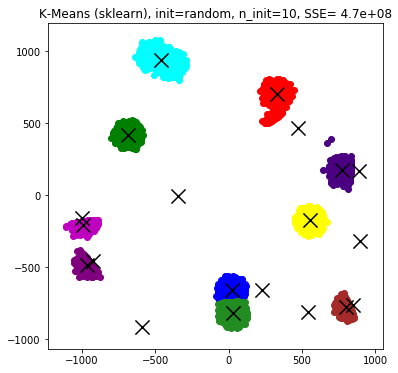

In [26]:
fig = plt.figure(figsize=(6, 6))

colors = est._colors
for label in range(10):
    cluster = X[np.where(est_sklearn.labels_ == label)]
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[label])

plt.scatter(est_sklearn.cluster_centers_[:, 0],
            est_sklearn.cluster_centers_[:, 1],
            c='black',
            s=200,
            marker='x')

plt.title(f'K-Means (sklearn), init=random, n_init=10, SSE={est_sklearn.inertia_ : .3}')
plt.show()

fig.savefig('K-Means_20_clusters_fail')

--------------- Algorithm details ---------------
    * Type: KMESA
    * Number of clusters (k): 20
    * Centroid initialization method: random
    * Initial centroids (specified): False
    * Number of initialization repetition: 2
    * Maximum iterations: 300
    * Convergence tolerance: 0.01
    * Empty clusters resolution method: random
    * Annealing method: random
    * Annealing probability function: sigmoid
    * Annealing probability alpha: 31
    * Annealing weight function: log
    * Annealing weight beta: 18
    * Convergence tracking: True
    * Annealing tracking: True
    * ECR tracking: False
    * Tracking scaler: None
-------------------------------------------------


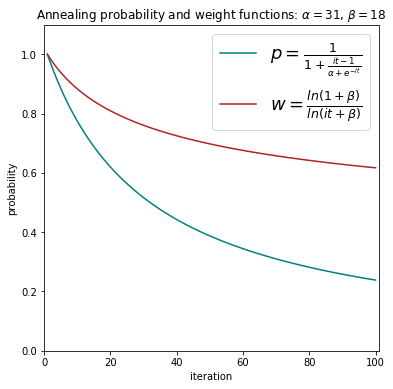

In [34]:
est_final = KMESA(k_clusters=20,
                  init='random',
                  n_init=4,
                  tol=1e-2,
                  annealing_method='random',
                  annealing_prob_function='sigmoid',
                  alpha=31,
                  annealing_weight_function='log',
                  beta=18,
                  convergence_tracking=True,
                  annealing_tracking=True,
                  ecr_tracking=True,
                  tracking_scaler=scaler
                  )
est_final.print_details()
est_final.plot_annealing_functions(n_iter=100)

------------- KMESA clustering -------------
    * Iterations before convergence: 140
    * Total empty cluster resolutions: 230
    * Total annealings: 549
    * Sum of squared error:  4.07e+06
    * Time elapsed: 23min 0s
 ---------------------------------------------


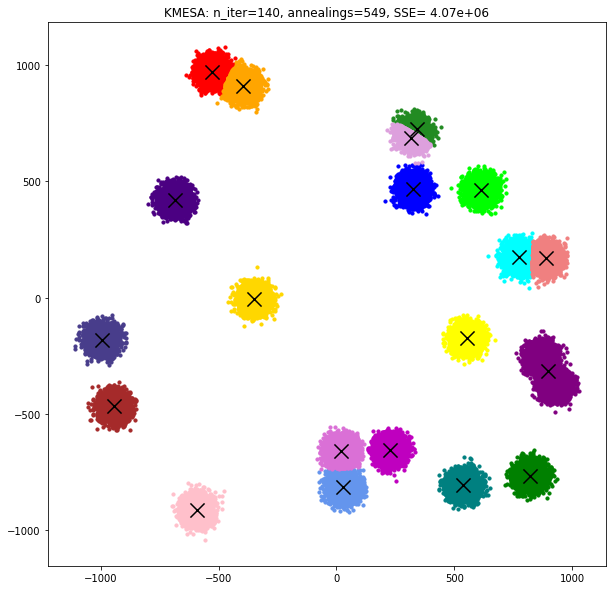

In [35]:
est_final.fit(X_scaled)
est.print_clustering_info()
est.plot_clustered_data(X, 
                        show_cc_labels=False,
                        out_file='KMESA_final_huge_dataset_random_annealing')